### ANN using PyTorch

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset,DataLoader
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [2]:
torch.manual_seed(42)

In [4]:
df = pd.read_csv("dataset/fmnist_small.csv")
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,9,0,0,0,0,0,0,0,0,0,...,0,7,0,50,205,196,213,165,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,142,142,142,21,0,3,0,0,0,0
3,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,0,0,0,0,0,0,0,0,0,...,213,203,174,151,188,10,0,0,0,0


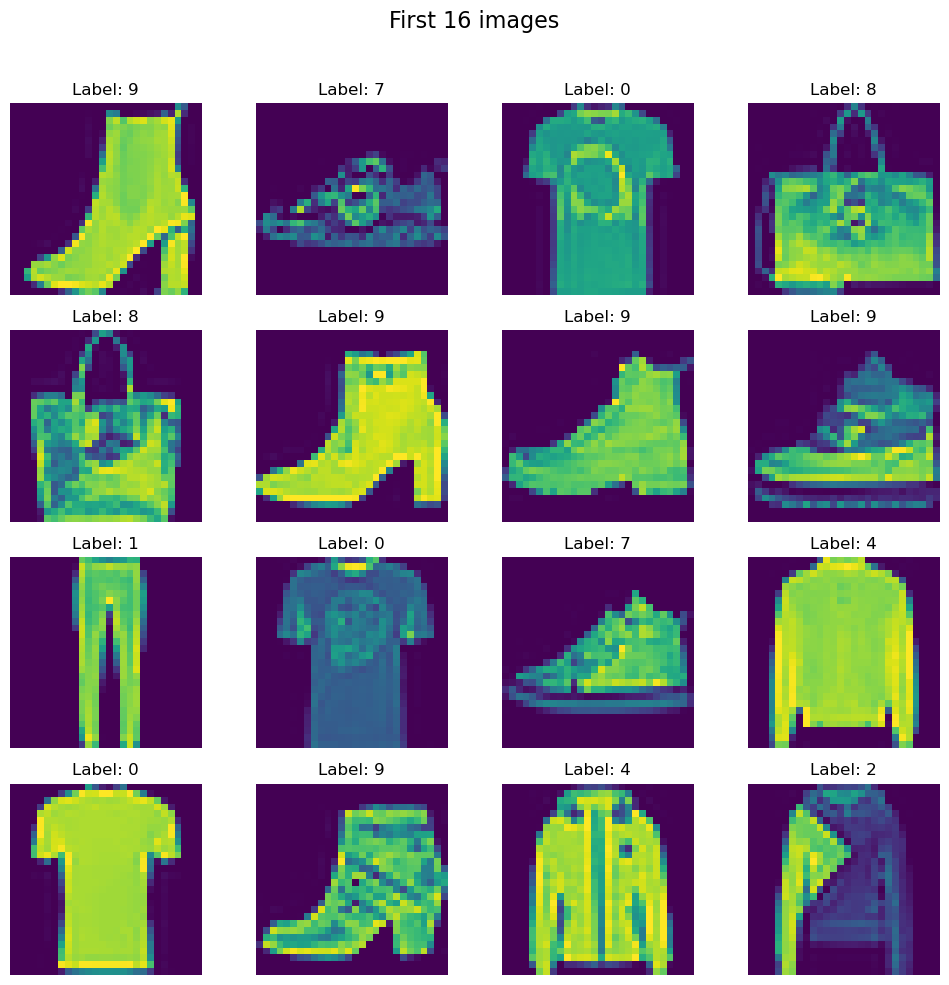

In [5]:
fig,axes = plt.subplots(4,4,figsize=(10,10))
fig.suptitle("First 16 images",fontsize=16)

for i,ax in enumerate(axes.flat):
    img = df.iloc[i,1:].values.reshape(28,28)
    ax.imshow(img)
    ax.axis("off")
    ax.set_title(f"Label: {df.iloc[i,0]}")
    
plt.tight_layout(rect=[0,0,1,0.96])
plt.show()

In [32]:
#train test split
X = df.iloc[:,1:].values
y = df.iloc[:,0].values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

X_train = X_train/255.0
X_test = X_test/255.0

In [33]:
#CustomDataset class
class CustomDataset(Dataset):
    def __init__(self,features,labels):
        self.features = torch.tensor(features,dtype=torch.float32)
        self.labels = torch.tensor(labels,dtype=torch.long)
        
    def __len__(self):
        return len(self.features)
    
    def __getitem__(self, index):
        return self.features[index],self.labels[index]

In [34]:
train_dataset = CustomDataset(X_train,y_train)
len(train_dataset)

4800

In [35]:
test_dataset = CustomDataset(X_test,y_test)
len(test_dataset)

1200

In [36]:
train_loader = DataLoader(train_dataset,batch_size=32,shuffle=True)
test_loader = DataLoader(test_dataset,batch_size=32,shuffle=False)

In [37]:
#create NN
class NN(nn.Module):
    def __init__(self,num_features):
        super().__init__()
        self.model=nn.Sequential(
            nn.Linear(num_features,128),
            nn.ReLU(),
            nn.Linear(128,64),
            nn.ReLU(),
            nn.Linear(64,10)
        )
        
    def forward(self,x):
        return self.model(x)

In [38]:
epochs = 100
learning_rate = 0.1

In [39]:
model = NN(X_train.shape[1])
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(),lr=learning_rate)

In [40]:
#training loop
for epoch in range(epochs):
    
    total_epoch_loss = 0
    for batch_features, batch_labels in train_loader:
        #forward pass
        outputs = model(batch_features)
        
        #calculate loss
        loss= criterion(outputs, batch_labels)
        
        #backward pass
        optimizer.zero_grad()
        loss.backward()
        
        #update grads
        optimizer.step()
        
        total_epoch_loss+=loss.item()
        
    avg_loss = total_epoch_loss/len(train_loader)
    print(f"Epoch : {epoch+1}, Loss:{avg_loss}")
        

Epoch : 1, Loss:1.3470052524407705
Epoch : 2, Loss:0.7789573476711908
Epoch : 3, Loss:0.6505434088905653
Epoch : 4, Loss:0.5815447773536047
Epoch : 5, Loss:0.5400441136956214
Epoch : 6, Loss:0.49835661361614864
Epoch : 7, Loss:0.4672758835554123
Epoch : 8, Loss:0.4402101857463519
Epoch : 9, Loss:0.42660367394487064
Epoch : 10, Loss:0.3987228943904241
Epoch : 11, Loss:0.39149292588233947
Epoch : 12, Loss:0.35922583043575285
Epoch : 13, Loss:0.3510331778724988
Epoch : 14, Loss:0.3391282739738623
Epoch : 15, Loss:0.32781073038776715
Epoch : 16, Loss:0.30541254435976345
Epoch : 17, Loss:0.30060299654801687
Epoch : 18, Loss:0.27730961059530573
Epoch : 19, Loss:0.29865051796038944
Epoch : 20, Loss:0.27678090157608193
Epoch : 21, Loss:0.255534104903539
Epoch : 22, Loss:0.24664489996929964
Epoch : 23, Loss:0.2477693503846725
Epoch : 24, Loss:0.23273408663769563
Epoch : 25, Loss:0.23383349888026714
Epoch : 26, Loss:0.2114444144318501
Epoch : 27, Loss:0.20590276308357716
Epoch : 28, Loss:0.20472

In [41]:
#set model to eval
total = 0
correct = 0

with torch.no_grad():
    
    for batch_features,batch_labels in test_loader:
        outputs = model(batch_features)
        
        _,predicted=torch.max(outputs,1)
        total += batch_labels.shape[0]
        correct = correct + (predicted == batch_labels).sum().item()
        
    print(correct/total)

0.8416666666666667
